In [1144]:
# Data Manipulation Libraries
import numpy as numpy
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')
# Machine Learning Libraries 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions



In [1145]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Data Preprocessing

In [1147]:
print(df.isnull().sum())
print()
print(df.duplicated().sum())

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

33


In [1148]:
df.count()

Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [1149]:
# df.drop_duplicates(inplace=True)
# df.duplicated().sum()

In [1150]:
df.count()

Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [1151]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [1152]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

# Data Visualization

## scatterplot

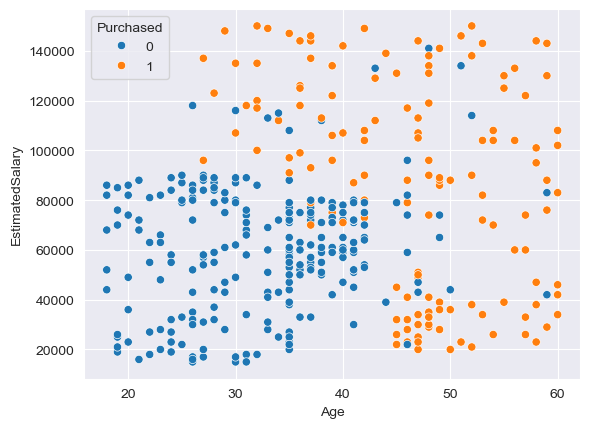

In [1155]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.show()

## Train Test Split

In [1157]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print("Succesfully Completed!")

Succesfully Completed!


# Train Model( DecisionTreeClassifier )

In [1159]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42) # criterion : {"gini", "entropy", "log_loss"}, default="gini"
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1160]:
accuracy_score = dt.score(x_test, y_test)
print("Accuracy:", accuracy_score)

Accuracy: 0.8375


## Plot Decision Tree Classifier

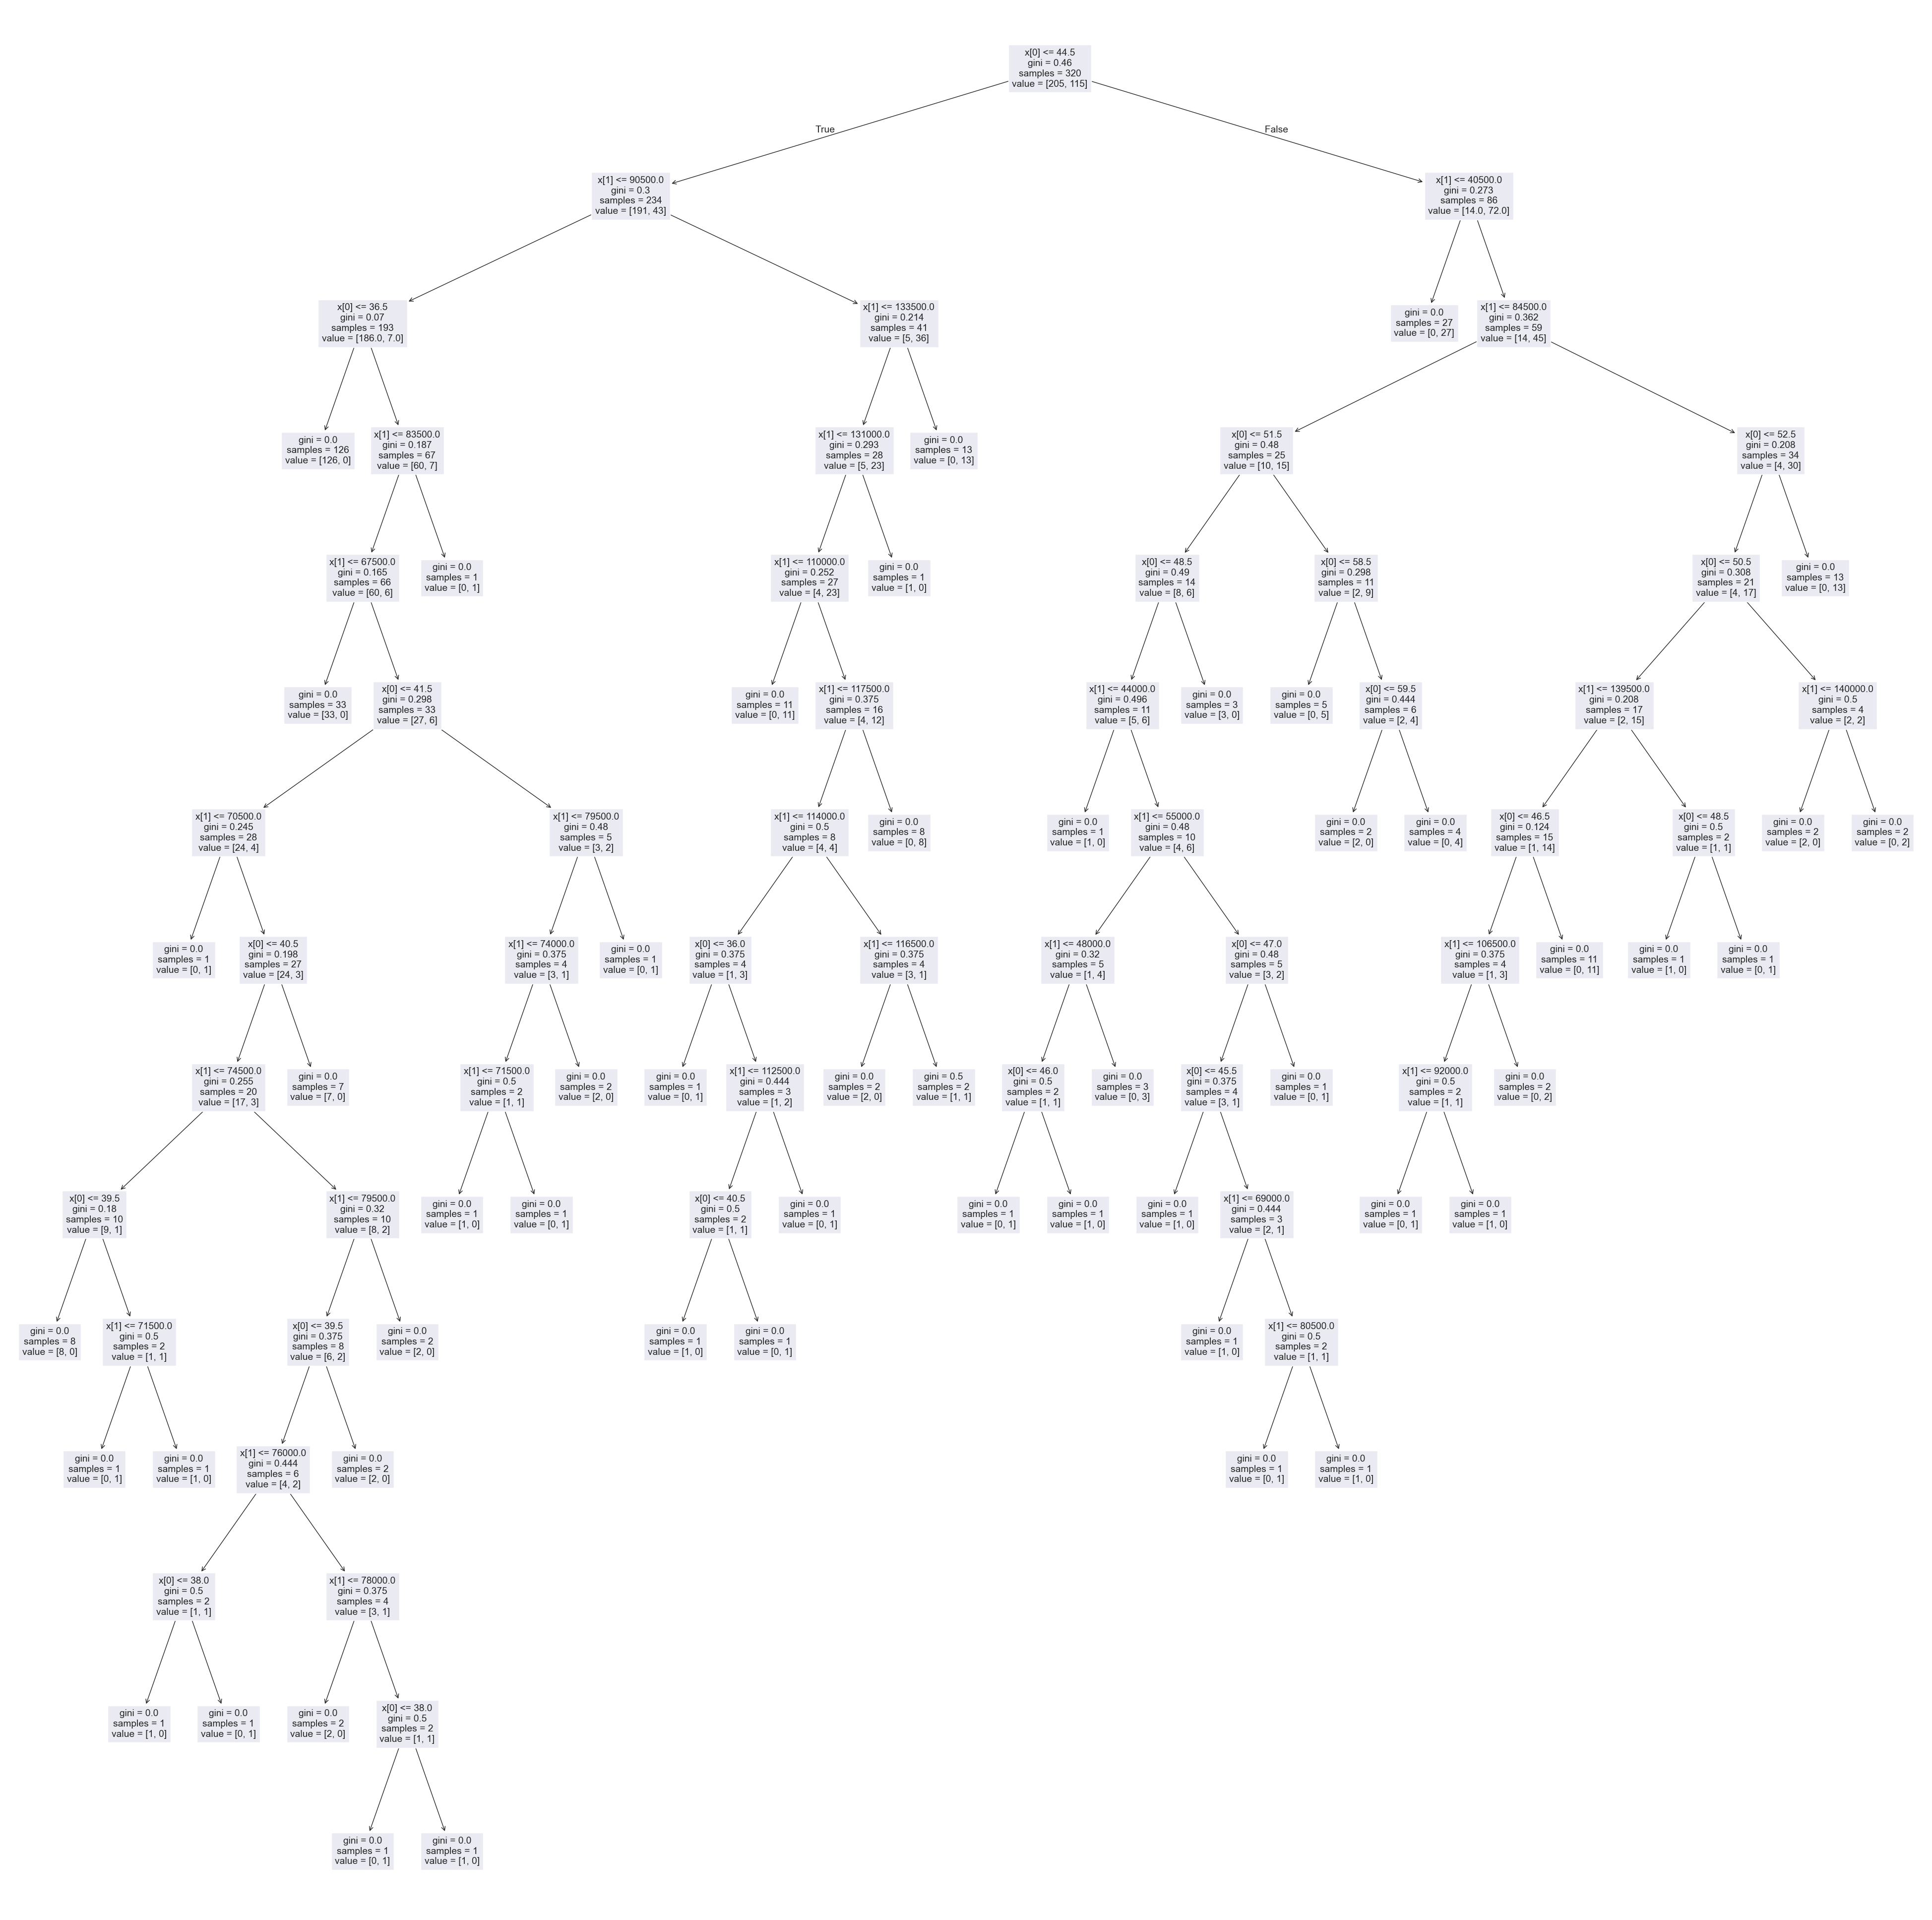

In [1162]:
plt.figure(figsize=(50,50))
plot_tree(dt)
# plt.savefig("Dt_plot.png")
plt.show()

In [1163]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## scatterplot

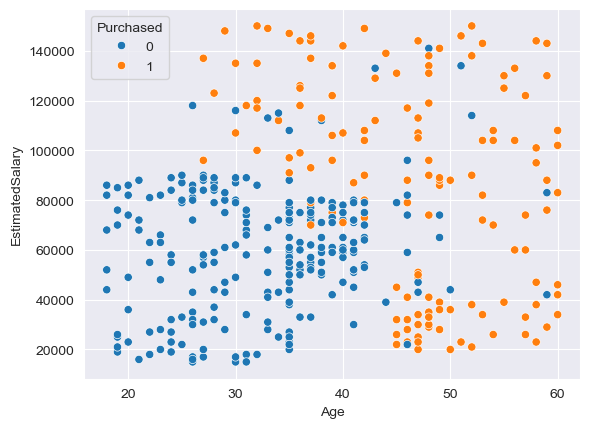

In [1165]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)
plt.show()

## Classifications Graph

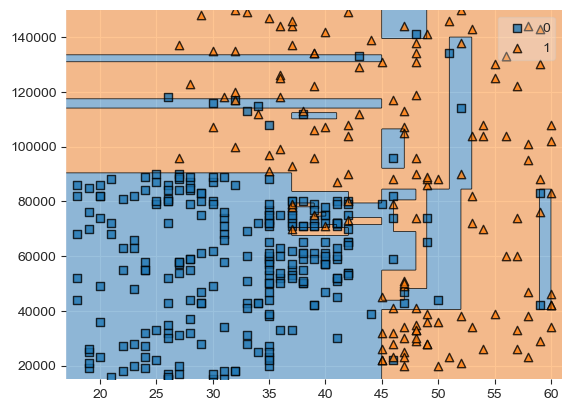

In [1167]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt) 
plt.show()

## Confusion Matrix

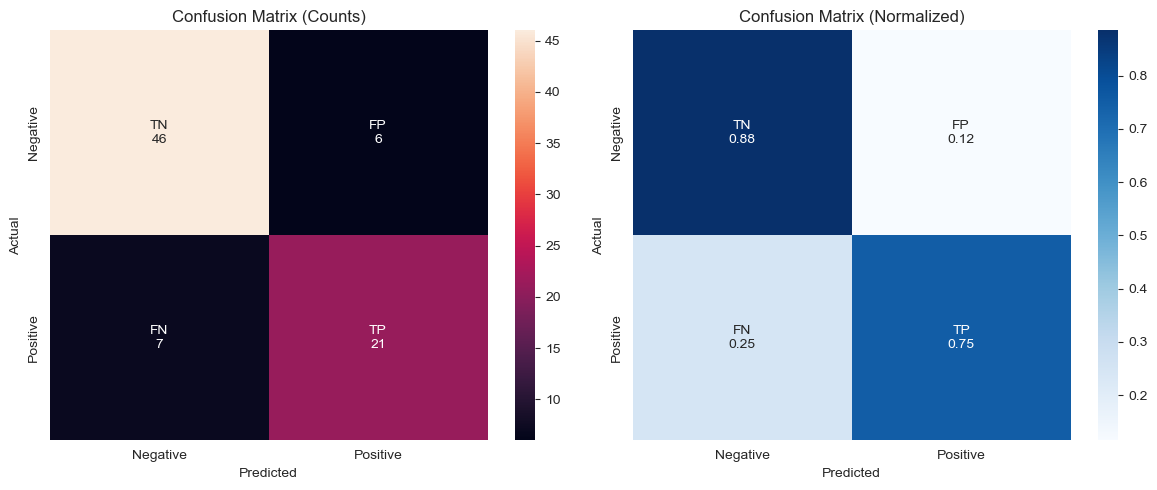

In [1169]:

# 1. Count Confusion Matrix
y_prd = dt.predict(x_test)
cm = confusion_matrix(y_test, y_prd)

labels_count = np.array([
    [f"TN\n{cm[0,0]}", f"FP\n{cm[0,1]}"],
    [f"FN\n{cm[1,0]}", f"TP\n{cm[1,1]}"]
])

# 2. Normalized Confusion Matrix
cm_norm = confusion_matrix(
    y_test,
    y_prd,
    normalize="true"
)

labels_norm = np.array([
    [f"TN\n{cm_norm[0,0]:.2f}", f"FP\n{cm_norm[0,1]:.2f}"],
    [f"FN\n{cm_norm[1,0]:.2f}", f"TP\n{cm_norm[1,1]:.2f}"]
])

# 3. Plot side by side
plt.figure(figsize=(12, 5))

# Count CM
plt.subplot(1, 2, 1)
sns.heatmap(
    cm,
    annot=labels_count,
    fmt="",
    # cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Normalized CM
plt.subplot(1, 2, 2)
sns.heatmap(
    cm_norm,
    annot=labels_norm,
    fmt="",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
# plt.savefig("Confusion_matrix.png")
plt.show()


# Pre-Pruning and Post-Pruning
Pre-pruning and post-pruning techniques are used to control model complexity and reduce overfitting, ensuring better generalization to unseen data.

## <span style="color:white;"><b>Post-Pruning:</b></span> Find Best <span style="color:green;"><i>max_depth</i> </span>Value for <span style="color:green;"><i>DecisionTreeClassifier</i></span>


In [1172]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# STORE RESULTS
results = []

for depth in range(1, 20):
    dt_02 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_02.fit(x_train, y_train)

    train_acc = round(dt_02.score(x_train, y_train) * 100, 2)
    test_acc = round(dt_02.score(x_test, y_test) * 100, 2)

    results.append([depth, train_acc, test_acc])

# CREATE DATAFRAME
result_df = pd.DataFrame(
    results,
    columns=["Max_Depth", "Train_Accuracy", "Test_Accuracy"]
)

# ACCURACY DIFFERENCE(Diff)
result_df["Accuracy_Diff_Neg"] = (
    result_df["Train_Accuracy"] - result_df["Test_Accuracy"]
)

result_df["Accuracy_Diff_Abs"] = result_df["Accuracy_Diff_Neg"].abs()

# SORT RESULTS
result_df_sorted = (
    result_df
    .sort_values(by="Accuracy_Diff_Abs", ascending=True)
    .reset_index(drop=True)
)

# SHOW ONLY NEGATIVE VALUES
result_df_sorted["Accuracy_Diff_Neg"] = (
    result_df_sorted["Accuracy_Diff_Neg"]
    .apply(lambda x: f"{x:.2f}" if x < 0 else "")
)

# REORDER COLUMNS
result_df_sorted = result_df_sorted[
    [
        "Max_Depth",
        "Train_Accuracy",
        "Test_Accuracy",
        "Accuracy_Diff_Abs",
        "Accuracy_Diff_Neg"
    ]
]

result_df_sorted


,Max_Depth,Train_Accuracy,Test_Accuracy,Accuracy_Diff_Abs,Accuracy_Diff_Neg
0,2,91.88,91.25,0.63,
1,3,91.88,91.25,0.63,
2,4,93.12,91.25,1.87,
3,5,93.44,90.00,3.44,
4,1,82.19,90.00,7.81,-7.81
5,6,95.00,86.25,8.75,
6,7,96.88,85.00,11.88,
7,8,97.50,85.00,12.50,
8,9,98.12,85.00,13.12,
9,10,98.44,85.00,13.44,


# DecisionTreeClassifier Model

In [1174]:
dt_1 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Model Accuracy

In [1176]:
accuracy_score = round(dt_1.score(x_test, y_test)*100, 2)
print("Model Accuracy:", accuracy_score)

Model Accuracy: 91.25


## Decision Tree Classifier

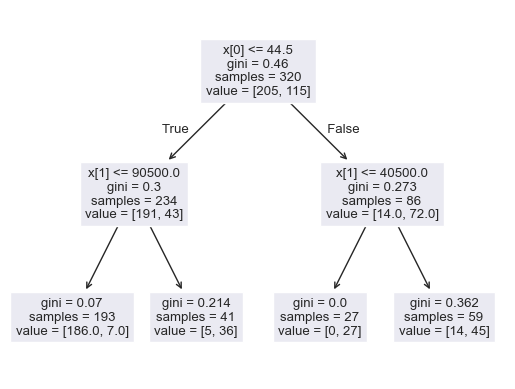

In [1178]:
# plt.figure(figsize=(10,7))
plot_tree(dt_1)
# plt.savefig("Dt_plot.png")
plt.show()

## Classifications Graph

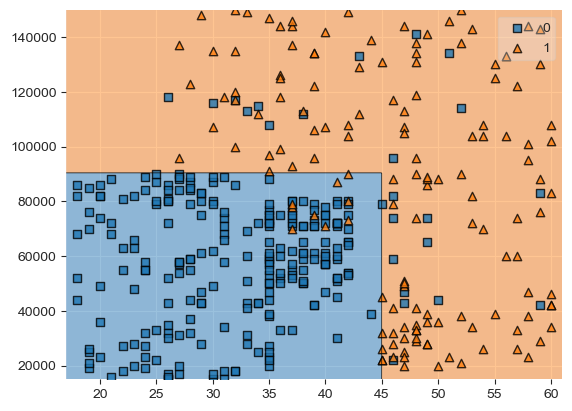

In [1180]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_1)
# plt.savefig('dt_graph.png')
plt.show()

## Confusion Matrix

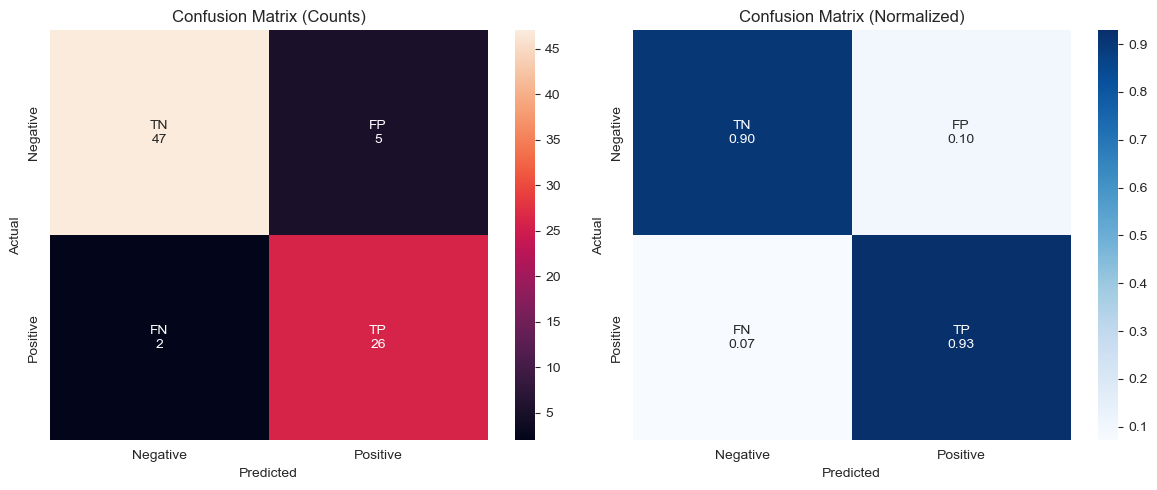

In [1182]:

# 1. Count Confusion Matrix
y_prd = dt_1.predict(x_test)
cm = confusion_matrix(y_test, y_prd)

labels_count = np.array([
    [f"TN\n{cm[0,0]}", f"FP\n{cm[0,1]}"],
    [f"FN\n{cm[1,0]}", f"TP\n{cm[1,1]}"]
])

# 2. Normalized Confusion Matrix
cm_norm = confusion_matrix(
    y_test,
    y_prd,
    normalize="true"
)

labels_norm = np.array([
    [f"TN\n{cm_norm[0,0]:.2f}", f"FP\n{cm_norm[0,1]:.2f}"],
    [f"FN\n{cm_norm[1,0]:.2f}", f"TP\n{cm_norm[1,1]:.2f}"]
])

# 3. Plot side by side
plt.figure(figsize=(12, 5))

# Count CM
plt.subplot(1, 2, 1)
sns.heatmap(
    cm,
    annot=labels_count,
    fmt="",
    # cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Normalized CM
plt.subplot(1, 2, 2)
sns.heatmap(
    cm_norm,
    annot=labels_norm,
    fmt="",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"]
)
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
# plt.savefig("Confusion_matrix.png")
plt.show()
